In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
data = pd.read_csv('tcp-connection (1).csv')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


# Data Preprocessing

In [4]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

In [6]:
data1 = data.select_dtypes(include = ['int64','float64'])

In [7]:
data1.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

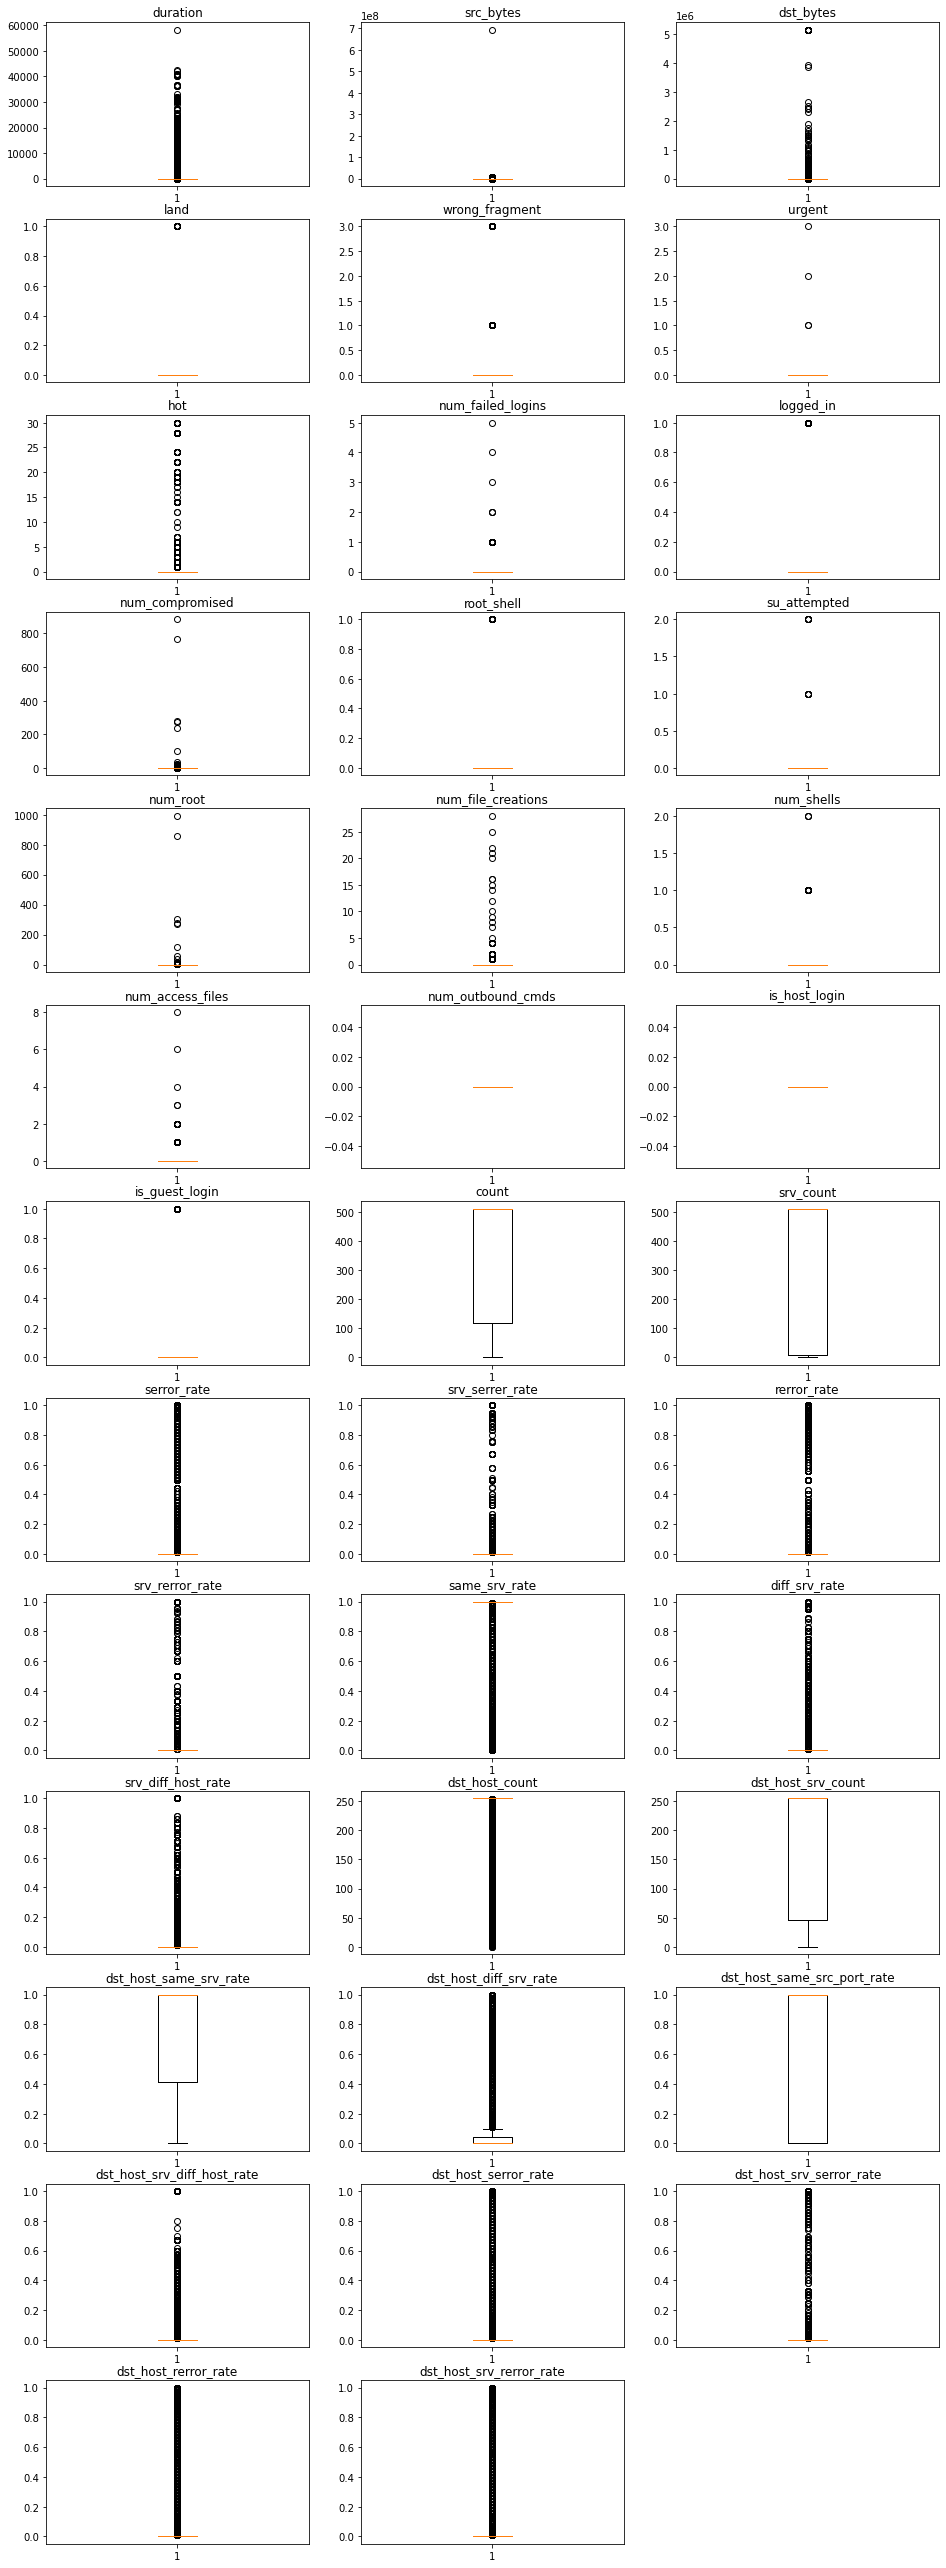

In [8]:
#checking for outliers
plt.figure(figsize=(16,50))
for i,feature in enumerate(data1.columns):
    plt.subplot(14,3,i+1)
    plt.boxplot(data1[feature])
    plt.title(feature)
plt.show()

In [11]:
#handling outliers using capping/flooring method
for i in data1.columns:
    Q1 = np.percentile(data1[i], 25)
    Q2 = np.percentile(data1[i], 50)
    Q3 = np.percentile(data1[i], 75)
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    data1[i] = np.where(data1[i]>up_lim,up_lim,np.where(data1[i]<low_lim,low_lim,data1[i]))
    

In [14]:
data2 = data.select_dtypes(include = 'object')

In [15]:
data2.columns

Index(['protocol_type', 'service', 'flag', 'intrusion'], dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
for i in data2[['protocol_type', 'service', 'flag']]:
    data2[i] = label_en.fit_transform(data2[i])

In [17]:
data2.head()

,protocol_type,service,flag,intrusion
0,2,11,9,b'normal.'
1,1,50,9,b'normal.'
2,0,14,9,b'smurf.'
3,0,14,9,b'smurf.'
4,1,45,5,b'neptune.'


In [18]:
data3 = pd.concat([data1, data2], axis=1)

In [19]:
data3.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,intrusion
0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.0,2,11,9,b'normal.'
1,0.0,1489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.20,0.0,0.0,0.0,0.0,0.0,1,50,9,b'normal.'
2,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.0,0.0,0.0,0.0,0.0,0,14,9,b'smurf.'
3,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.0,0.0,0.0,0.0,0.0,0,14,9,b'smurf.'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,1,45,5,b'neptune.'


In [20]:
#splitting dataset into target and features
x = data3.drop('intrusion', axis = 1)
y = data3['intrusion']

In [21]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [22]:
#creating naive bayes model
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train, y_train)
y_pred = gn.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9678801029909478


In [24]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(x_train, y_train)
y_pred = mn.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.907275759882111


# Fine Tuning of Model

In [26]:
gn = GaussianNB(var_smoothing = 1e-7 )
gn.fit(x_train, y_train)
y_pred = gn.predict(x_test)

In [27]:
y_pred

array(["b'neptune.'", "b'neptune.'", "b'neptune.'", ..., "b'smurf.'",
       "b'smurf.'", "b'normal.'"], dtype='<U19')

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9707787475912102


In [29]:
data['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

We have achieved 97% accuracy through Gaussian Naive Bayes Model and in these classification only b'normal classification in intrusion column is good connection. All the others are bad connections.